<a href="https://colab.research.google.com/github/chathura40/Mini-Research-Project/blob/main/mine_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [19]:
# Directory to dataset in drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

dataset_path = '/content/drive/MyDrive/Colab Notebooks/data/'

Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
image_size = (150,150)
batch_size = 7


# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


train_batches = train_datagen.flow_from_directory(
        dataset_path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training')


validation_batches = train_datagen.flow_from_directory(
        dataset_path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation')


test_batches = train_datagen.flow_from_directory(
        dataset_path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary', 
        shuffle=False,
        subset='validation')

Found 8 images belonging to 2 classes.
Found 2 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


In [47]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,5)
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

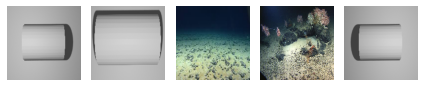

[0. 0. 1. 1. 0.]


In [50]:
imgs, labels = train_batches[0]
plotImages(imgs)
print(labels[:5])